# Lab 4

## Import libraries and connect to database

In [7]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [8]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [9]:
cur=conn.cursor()

## Q1: Use pandas to display all records in the student table

In [10]:
sql_q1 = """ select * from gp9.student"""

In [11]:
df=pandas.read_sql_query(sql_q1,conn)
df[:]

,studentemail,studentname,major
0,BJ@jmu,Bobby Joe,Intelligence Analysis
1,SS@jmu,Sapna Seth,Data Miner
2,OM@jmu,O'brine Martin,Puppies N' Kittens
3,CM@jmu,Caroline Marti,Art History and Cyber Security
4,DS@jmu,Dylan Shaffer,Intelligence Analysis
5,CW@jmu,Corinne Wilkerson,Artificial Intelligence
6,GH@jmu,Gavin Hasnoui,Reading Thinking and Writing
7,DC@jmu,Dmitri Custode,Computer Science
8,GR@jmu,Garrett Revelli,Geographic Science
9,RL@jmu,Robert Lee,Intelligence Analysis


## Q2: Use pandas to display teacher names and corresponding course names jointly

In [12]:
sql_q2 = """ select gp9.professor.professorname, 
            gp9.course.coursename 
            from gp9.professor
            inner join gp9.course
            on professor.professoremail = course.professoremail"""

In [13]:
df=pandas.read_sql_query(sql_q2,conn)
df[:]

,professorname,coursename
0,Danzell,AML
1,Hendrickson,Futures
2,Marrin,Seminar
3,Wei,Data Mining
4,McTeacher,Fluid Dynamics
5,McTeacher,Hypothesis Testing


## Q3: Use pandas to create a bar chart showing the number of enrolled students by each course number

In [14]:
sql_q3 = """ select coursenumber,
            count(coursenumber) as enrolled
            from gp9.enroll_list
            group by coursenumber
            order by enrolled desc"""

<AxesSubplot:xlabel='coursenumber'>

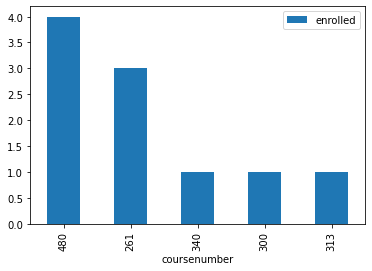

In [15]:
df=pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='coursenumber')

## Q4: Use pandas to create a bar chart showing the number of courses taught by each professor's name

In [16]:
sql_q4 = """ select professorname,
            count(coursename) as total_courses
            from gp9.course
            group by professorname
            order by total_courses desc"""

<AxesSubplot:xlabel='professorname'>

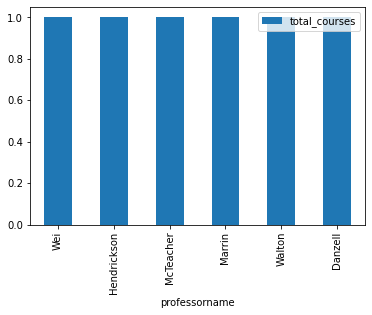

In [17]:
df=pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='total_courses', x='professorname')

## Q5: Add a record of the new professor in the teacher table and the corresponding new course record in the course table, then display both modified tables.

Modify professor table

In [37]:
sql_q5 = """
            insert into gp9.professor(professoremail,coursenumber, professorname,office)
            values('{}','{}','{}','{}')
            """.format('new_lab4_email', 'new_lab4_coursenumber','new_lab4_p_name','new_lab4_o')
print(sql_q5)


            insert into gp9.professor(professoremail,coursenumber, professorname,office)
            values('new_lab4_email','new_lab4_coursenumber','new_lab4_p_name','new_lab4_o')
            


In [38]:
cur.execute(sql_q5)

In [39]:
#conn.rollback() #if error, rollback

In [40]:
conn.commit() #if no error. commit

In [41]:
df=pandas.read_sql_query('select * from gp9.professor',conn)
df[:]

,professoremail,coursenumber,professorname,office
0,danzelox@jmu.edu\n,480,Danzell,11
1,hendrinx@jmu.edu\n,313,Hendrickson,22
2,marrinsp@jmu.edu\n,300,Marrin,33
3,weixx@jmu.edu,340,Wei,55
4,mcteach@jmu.edu,2,McTeacher,45
5,new_lab4_email,new_lab4_coursenumber,new_lab4_p_name,new_lab4_o


Modify course table

In [61]:
sql_q5_part2 = """
            insert into gp9.course(coursenumber,coursename,professoremail,professorname)
            values('{}','{}','{}','{}')
            """.format('new_lab4_room','new_lab4_cousrename','new_lab4_email','new_lab4_p_name')
print(sql_q5_part2)


            insert into gp9.course(coursenumber,coursename,professoremail,professorname)
            values('new_lab4_room','new_lab4_cousrename','new_lab4_email','new_lab4_p_name')
            


In [62]:
cur.execute(sql_q5_part2)

In [63]:
conn.commit()

In [64]:
df=pandas.read_sql_query('select * from gp9.course',conn)
df[:]

,coursenumber,coursename,professoremail,professorname
0,480,AML,danzelox@jmu.edu\n,Danzell
1,313,Futures,hendrinx@jmu.edu\n,Hendrickson
2,300,Seminar,marrinsp@jmu.edu\n,Marrin
3,340,Data Mining,weixx@jmu.edu,Wei
4,2,Fluid Dynamics,mcteach@jmu.edu,McTeacher
5,261,Hypothesis Testing,mcteach@jmu.edu,Walton
6,new_lab4_room,new_lab4_cousrename,new_lab4_email,new_lab4_p_name


# Q6: Suppose a newly hired professor will teach a retiring professor's courses. Delete an existing professor and change the instructor to the newly hired professor and display the tables.

update the course table

In [83]:
q6_update_course_sql = """
                    update gp9.course
                    set professoremail = '{}'
                    where professoremail = '{}'
                    """.format('new_lab4_email','mcteach@jmu.edu')



In [84]:
cur.execute(q6_update_course_sql)

In [85]:
conn.commit() # no error. commit

In [82]:
conn.rollback()

In [86]:
df=pandas.read_sql_query('select * from gp9.course',conn)
df[:]

,coursenumber,coursename,professoremail,professorname
0,480,AML,danzelox@jmu.edu\n,Danzell
1,313,Futures,hendrinx@jmu.edu\n,Hendrickson
2,300,Seminar,marrinsp@jmu.edu\n,Marrin
3,340,Data Mining,weixx@jmu.edu,Wei
4,new_lab4_room,new_lab4_cousrename,new_lab4_email,new_lab4_p_name
5,2,Fluid Dynamics,new_lab4_email,McTeacher
6,261,Hypothesis Testing,new_lab4_email,Walton


delete the old professor

In [88]:
q6_delete_professor_sql = """
                            delete from gp9.professor
                            where professoremail='{}'
                            """.format('mcteach@jmu.edu')

In [89]:
cur.execute(q6_delete_professor_sql)

In [90]:
conn.commit()

In [91]:
df=pandas.read_sql_query('select * from gp9.professor',conn)
df[:]


,professoremail,coursenumber,professorname,office
0,danzelox@jmu.edu\n,480,Danzell,11
1,hendrinx@jmu.edu\n,313,Hendrickson,22
2,marrinsp@jmu.edu\n,300,Marrin,33
3,weixx@jmu.edu,340,Wei,55
4,new_lab4_email,new_lab4_coursenumber,new_lab4_p_name,new_lab4_o


## Close the cursor and the connection

In [92]:
cur.close()

In [93]:
conn.close()